# mpslib_2d_to_coarsen: Effect fo coarsening the training image

In [1]:
# load some some modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpslib as mps
import copy

Define two training images, using every 6th entry in the 250x250 strebelle/channel training image.

The first use every 6th entry starting in index [0,0]

The second use every 6th entry starting in index [0,0],[1,0],[0,1],[1,1],...[5,5], using ALL the training image. The third dimension is in this case of size 5^2=25.

In [2]:
di=4 # Use every di'th data
# NO coarsening --> 1 2D TI
TI1, TI_filename1 = mps.trainingimages.strebelle(di, coarse3d=0)
# Coarsening --> multiple 2D TI
TI2, TI_filename2 = mps.trainingimages.strebelle(di, coarse3d=1)


Loading ti_strebelle.dat
Loading ti_strebelle.dat


Run the simulation with both types of training image

In [3]:
alg='mps_snesim_tree'
#alg='mps_genesim'
O1=mps.mpslib(method=alg)
O1.ti = TI1
O1.par['debug_level']=-1
O1.par['ti_fnam']='ti1.dat'
O1.par['simulation_grid_size'][0]=85
O1.par['simulation_grid_size'][1]=45
O1.par['simulation_grid_size'][2]=1
O1.par['shuffle_simulation_grid']=2
O1.par['rseed']=1
O1.par['n_real']=1
O1.parameter_filename='sim1.par'
O1.run()

# copy the first object, but use the 2nd TI
O2 = copy.deepcopy(O1)
O2.ti = TI2
O2.run()

eas: writing matrix to ti1.dat 
eas: (nx,ny,nz)=(63,63,1) 
eas: title=63 63 1
mpslib: trying to run 'mps_snesim_tree'  in folder '/home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree'
mpslib: Using the following executable to run the model: /home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree
eas: writing data to ti1.dat.gslib, ncolumns=1, ndata=3825.
eas: writing matrix to ti1.dat 
eas: (nx,ny,nz)=(62,62,16) 
eas: title=62 62 16
mpslib: trying to run 'mps_snesim_tree'  in folder '/home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree'
mpslib: Using the following executable to run the model: /home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree
eas: writing data to ti1.dat.gslib, ncolumns=1, ndata=3825.


True

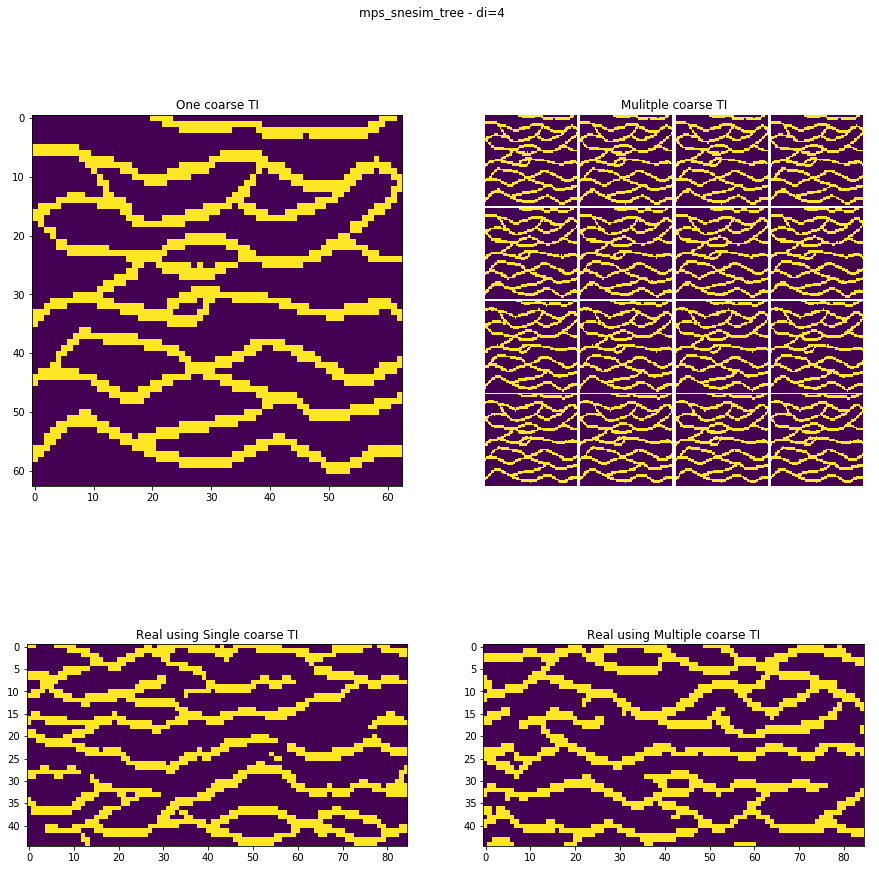

In [4]:
#%% Plot the training images, and simulation results
fig = plt.figure(figsize=(15, 15))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

ax1 = plt.Subplot(fig, outer[0])
fig.add_subplot(ax1)
plt.imshow(TI1)
plt.title('One coarse TI')

ax1 = plt.Subplot(fig, outer[1])
fig.add_subplot(ax1)
plt.axis('off')
plt.title('LL')
plt.title('Mulitple coarse TI')

nsp = int(np.floor(np.sqrt(TI2.shape[2])))

for i in [1]:
    inner = gridspec.GridSpecFromSubplotSpec(nsp, nsp,
                    subplot_spec=outer[i], wspace=0.02, hspace=0.02)

    for j in range(nsp*nsp):
        ax = plt.Subplot(fig, inner[j])
        fig.add_subplot(ax)
        plt.imshow(TI2[:, :, j])
        plt.axis('off')


#%%
ax3 = plt.Subplot(fig, outer[2])
fig.add_subplot(ax3)
plt.imshow(O1.sim[0])
plt.title('Real using Single coarse TI')

ax4 = plt.Subplot(fig, outer[3])
fig.add_subplot(ax4)
plt.imshow(O2.sim[0])
plt.title('Real using Multiple coarse TI')

plt.suptitle("%s - di=%d" % (alg,di))
plt.savefig('mpslib_coarsen_%d_%s.png'%(di,alg))

plt.show()